## Gradient Boosting with XGBMs[Extreme Gradient boosting machines]:


### Downloading dataset:

- dataset used: Rossman store sales dataset
- link: 'https://www.kaggle.com/c/rossmann-store-sales'

In [113]:
!pip install opendatasets --quiet 

In [114]:
import os
import opendatasets as od
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [115]:
od.download("https://www.kaggle.com/c/rossmann-store-sales")

Skipping, found downloaded files in "./rossmann-store-sales" (use force=True to force download)


Loading up the data into their respective dataframes:


In [116]:
training_df = pd.read_csv("rossmann-store-sales/train.csv") 
testing_df = pd.read_csv("rossmann-store-sales/test.csv") 
store_df = pd.read_csv("rossmann-store-sales/store.csv")
sample_sub_df = pd.read_csv("rossmann-store-sales/sample_submission.csv") 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [117]:
training_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [118]:
testing_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [119]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [120]:
sample_sub_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


Merging the "Store" data onto the Train data and test data:

- completing this step makes our train/test dataset much more meaningful as we can now grab many insights from these merged dataframes.

In [121]:
merged_train_df = training_df.merge(store_df, how='left', on="Store") 

merged_test_df = testing_df.merge(store_df, how='left', on='Store') 

In [122]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [123]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### PHASE I: Exploratory Data Analysis:

In [124]:
merged_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


- checking for nan values.

In [125]:
na_features = [features for features in merged_train_df.columns if merged_train_df[features].isnull().sum()>1]

for features in na_features:
    print(features, np.round(merged_train_df[features].isnull().mean(), 4), "% missing values") 

CompetitionDistance 0.0026 % missing values
CompetitionOpenSinceMonth 0.3179 % missing values
CompetitionOpenSinceYear 0.3179 % missing values
Promo2SinceWeek 0.4994 % missing values
Promo2SinceYear 0.4994 % missing values
PromoInterval 0.4994 % missing values


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

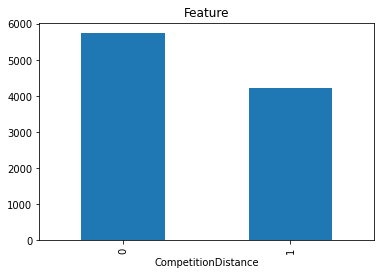

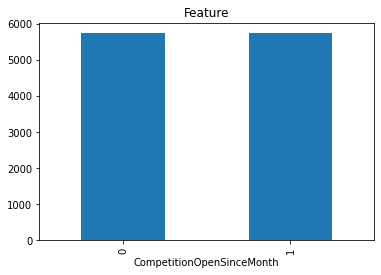

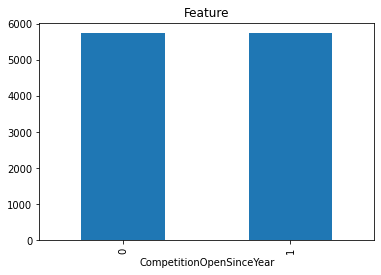

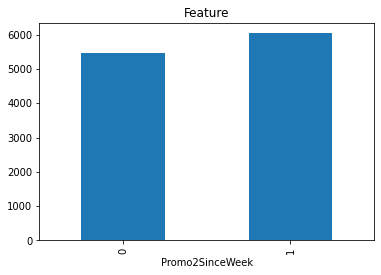

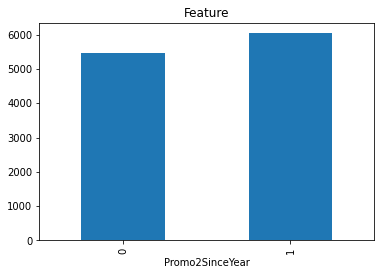

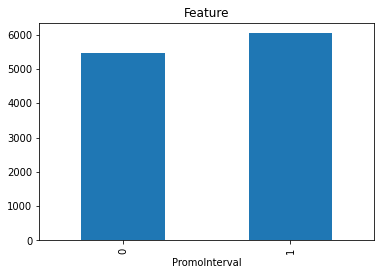

In [127]:
##Plotting these values graphically

for feature in na_features:
    data = merged_train_df.copy() #a copy of original dataset

    data[feature] = np.where(data[feature].isnull(), 1, 0)
    # variable which acts as a NaN value indicator, 1 = NaN values, 0= Non NaN values

    data.groupby(feature)['Sales'].median().plot.bar()
    plt.title("Feature")
    plt.show()

- Extracting Numerical columns:


In [128]:
numeric_feature = [feature for feature in merged_train_df.columns if merged_train_df[feature].dtype != 'object']

print("Total Numeric features: ", len(numeric_feature))

merged_train_df[numeric_feature].head(10)

Total Numeric features:  13


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN
5,6,5,5651,589,1,1,1,310.0,12.0,2013.0,0,NaN,NaN
6,7,5,15344,1414,1,1,1,24000.0,4.0,2013.0,0,NaN,NaN
7,8,5,8492,833,1,1,1,7520.0,10.0,2014.0,0,NaN,NaN
8,9,5,8565,687,1,1,1,2030.0,8.0,2000.0,0,NaN,NaN
9,10,5,7185,681,1,1,1,3160.0,9.0,2009.0,0,NaN,NaN


- now there are two types of numerical features: <br>
  1. Discrete <br>
  2. continous 

In [129]:
#Analyzing Discrete Numerical features vs Sales:

discrete_features = [feature for feature in numeric_feature if len(merged_train_df[feature].unique())<25 and feature not in ['Id'] ]

print("Total Discrete Features: ", len(discrete_features))

Total Discrete Features:  8


In [130]:
merged_train_df[discrete_features]

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceYear
0,5,1,1,1,9.0,2008.0,0,NaN
1,5,1,1,1,11.0,2007.0,1,2010.0
2,5,1,1,1,12.0,2006.0,1,2011.0
3,5,1,1,1,9.0,2009.0,0,NaN
4,5,1,1,1,4.0,2015.0,0,NaN
...,...,...,...,...,...,...,...,...
1017204,2,0,0,1,6.0,2014.0,1,2013.0
1017205,2,0,0,1,4.0,2006.0,0,NaN
1017206,2,0,0,1,NaN,NaN,0,NaN
1017207,2,0,0,1,NaN,NaN,0,NaN


In [131]:
discrete_features

['DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceYear']

- Visualising relationship of discrete features with Sales:


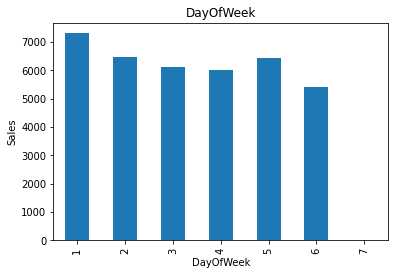

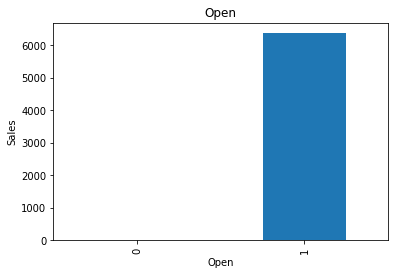

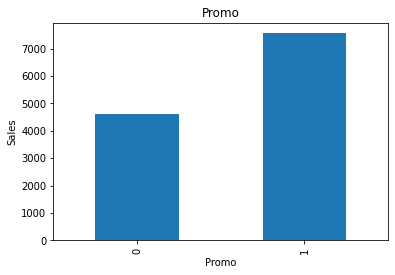

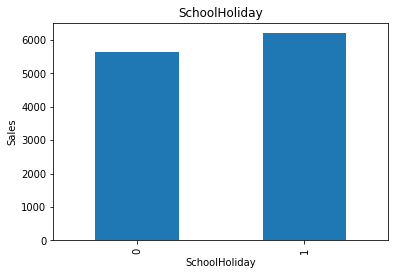

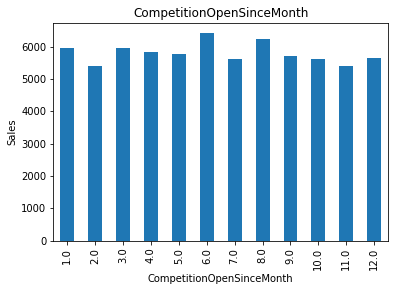

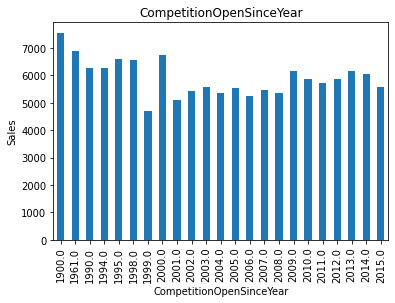

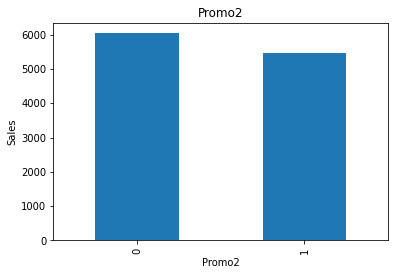

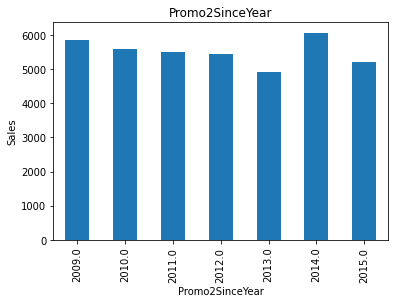

In [132]:
for feature in discrete_features:
    data = merged_train_df.copy()

    data.groupby(feature)["Sales"].median().plot.bar()
    plt.title(str(feature))
    plt.ylabel("Sales") 
    plt.show()


- Analyzing the relationships of Continous Numeric Features:

In [133]:
cont_feature = [feature for feature in numeric_feature if feature not in discrete_features+['Id']]



In [134]:
print("Total continous features: ", len(cont_feature))
print(cont_feature)

Total continous features:  5
['Store', 'Sales', 'Customers', 'CompetitionDistance', 'Promo2SinceWeek']


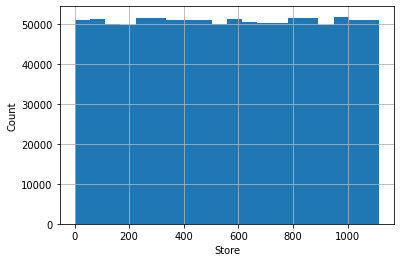

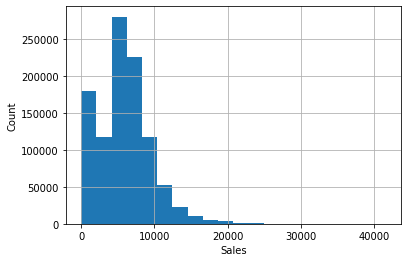

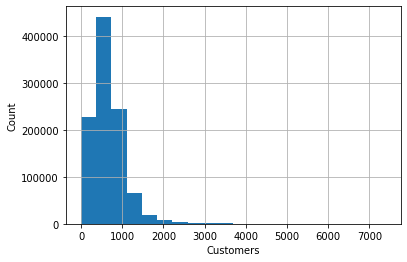

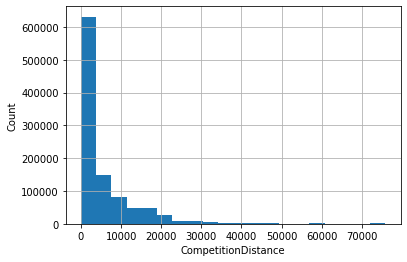

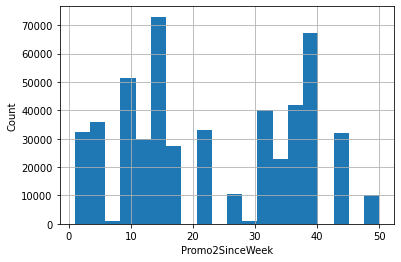

In [135]:
for feature in cont_feature:
    data = merged_train_df.copy()

    data[feature].hist(bins=20)
    plt.xlabel(str(feature))
    plt.ylabel("Count") 
    plt.show()

- Finding Outliers:

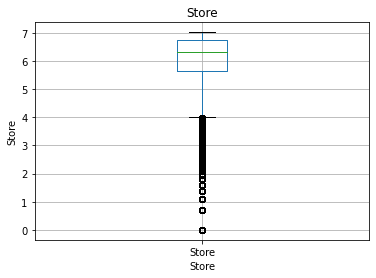

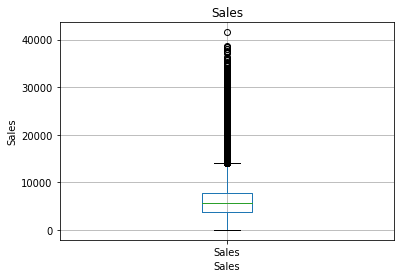

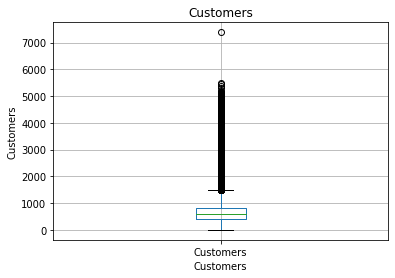

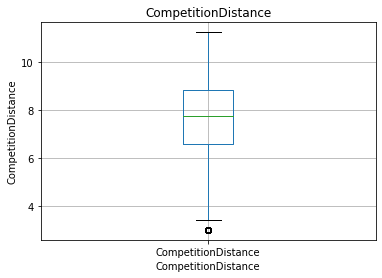

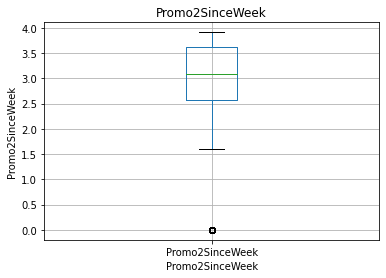

In [136]:
for feature in cont_feature:
    data = merged_train_df.copy()


    #Performing logarithmic conversion to normalize values:

    if 0 in data[feature].unique(): #avoiding log(0) condition
        pass 
    else:
        data[feature] = np.log(data[feature])

    #plotting boxplots to visualize outliers:
    data.boxplot(column=str(feature))
    plt.xlabel(str(feature))
    plt.ylabel(str(feature))
    plt.title(str(feature))
    plt.show()


### Phase 2: PreProcessing and Feature Engineering:


In [137]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

- Parsing out the Date column:

- to split the dates into day, week, month, year <br>
- this would allow our machine algo to grab some specific patterns

In [138]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month 
    df['Day'] = df.Date.dt.day
    df["WeekOfYear"] = df.Date.dt.isocalendar().week

In [139]:
split_date(merged_train_df)
split_date(merged_test_df)

In [140]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


- Store status: Open/Closed <br>

In [141]:
merged_train_df[merged_train_df.Open == 0].Sales.value_counts() #when store is closed


0    172817
Name: Sales, dtype: int64

* Sale when Open == 0: is 0

In [142]:
#since sales on the closed store day are 0  so we can just evaluate our data for the days store was open.


merged_df = merged_train_df[merged_train_df.Open == 1].copy()

- Effect of Competition on the Rossman Stores:

we can tell our model for how long a competition has been open rather than just specifying the Month/Year of opening <br>
if we specify for exactly how long competition has been around our target store, the model can note the pattern of sales<br>
and effect of the competition on the Sales.

In [143]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [144]:
def comp_months(df):

    #Specific Period for competition 
    df['CompetitionOpen'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)


    #If by chance there is a store that is not yet opened(until year <= 2015),[our test set has values from 2015 and up],
    # so to remove any -ve values, we will fill the negative spaces with 0

    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:0 if x<0 else x).fillna(0)

In [145]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [146]:
comp_months(merged_df)
comp_months(merged_test_df)

In [147]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
51812,2015-06-15,50.0,2013.0,11.0,19.0
796807,2013-07-17,1450.0,2005.0,4.0,99.0
431745,2014-06-10,450.0,2011.0,6.0,36.0
264246,2014-12-02,2590.0,NaN,NaN,0.0
988363,2013-01-26,16570.0,NaN,NaN,0.0
887524,2013-04-27,100.0,2015.0,4.0,0.0
650094,2013-11-26,2890.0,2007.0,12.0,71.0
629927,2013-12-14,5980.0,2005.0,10.0,98.0
485992,2014-04-22,10170.0,2001.0,11.0,149.0
248711,2014-12-18,1000.0,2008.0,9.0,75.0


- Additional Feature that could be engineered:<br>
 **Promo2**

In [148]:
def check_promo_month(row):
    month2str = {
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'
    }

    try:
        months = (row['PromoInterval'] or '').split(',') 
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else: 
            return 0
    except Exception:
        return 0



def promo_cols(df):
    #Specific Months since Promo2 was opened.
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5

    #filling in 0s where the desired columns are Nan or future dates.
    df['Promo2Open'] = df['Promo2Open'].map(lambda x : 0 if x < 0 else x).fillna(0)*df['Promo2']

    #Checking whether a new Promotion was started in the current months.
    df['IsPromo2Month'] = df.apply(check_promo_month, axis = 1)*df['Promo2']
    


In [149]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [150]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
431184,2014-06-10,0,NaN,NaN,NaN,0.000000,0
773673,2013-08-07,0,NaN,NaN,NaN,0.000000,0
267344,2014-11-28,0,NaN,NaN,NaN,0.000000,0
397349,2014-07-12,0,NaN,NaN,NaN,0.000000,0
355970,2014-08-26,1,2010.0,18.0,"Feb,May,Aug,Nov",51.901639,1
35272,2015-06-30,1,2014.0,18.0,"Jan,Apr,Jul,Oct",14.065574,0
150664,2015-03-18,1,2013.0,1.0,"Jan,Apr,Jul,Oct",26.524590,0
13032,2015-07-20,0,NaN,NaN,NaN,0.000000,0
333552,2014-09-19,0,NaN,NaN,NaN,0.000000,0
463258,2014-05-12,1,2014.0,40.0,"Jan,Apr,Jul,Oct",0.000000,0


In [151]:
!pip install jovian --quiet

In [152]:
import jovian

- Preprocessing phase:


Identifying Input & Target columns:


In [153]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [154]:
inputs = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
                'CompetitionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Promo2Open', 'IsPromo2Month']



target = 'Sales'

In [155]:
#for training set

inputs_df = merged_df[inputs].copy()
target_df = merged_df[target].copy()

In [156]:
#For Testing set:

inputs_test_df = merged_test_df[inputs].copy()

In [157]:
inputs_df

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


- Identifying Numerical and categorical cols:


In [158]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 
'IsPromo2Month', 'Day', 'Month', 'Year', 'WeekOfYear']


categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

- **Imputing Missing Values in Numerical columns**:

In [159]:
inputs_df[numeric_cols].isna().sum()


Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [160]:
inputs_test_df[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

- the only missing values are in the **"CompetitionDistance"**: we can only draw one inference, there is no<br>
competing store nearby the target store

- So we can fill the missing values with an outlier, rather than filling with 0's or mean or median, because <br>
filling the missing cells with these values will make our model think there is a store in vicinity<br>
which will greatly affect our model's predicitions

In [161]:
max_distance = inputs_df.CompetitionDistance.max()
max_distance

75860.0

a max of 75.8kms is observed, we can just double this value and impute it in our missing values.

In [162]:
inputs_df['CompetitionDistance'].fillna(max_distance*2, inplace=True)
inputs_test_df['CompetitionDistance'].fillna(max_distance*2, inplace=True)

- **Scaling Down The Numeric Values**:

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])

In [165]:
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
inputs_test_df[numeric_cols] = scaler.transform(inputs_test_df[numeric_cols])

- **Encoding the Categorical columns using OneHotEncoder**:

In [166]:
inputs_df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

there is an int value too in this col, we have to hardcode it into object/str type

In [167]:
inputs_df['StateHoliday'] = inputs_df['StateHoliday'].astype(str)

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [170]:
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

inputs_test_df[encoded_cols] = encoder.transform(inputs_test_df[categorical_cols])

In [171]:
X = inputs_df[numeric_cols + encoded_cols]

X_test = inputs_test_df[numeric_cols + encoded_cols]

In [172]:
jovian.commit(filename="XGBoost_algo.ipynb")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Phase 3: Training a Gradient Boosting Machine[GBM] on our processed data

- #### Creating and training our Gradient Boosting model:

In [173]:
#Creating the Gradient Boosting model:

#to train a Gradient boosting machine, we use XGBRegressor from xgboost library
from xgboost import XGBRegressor


#?XGBRegressor


In [174]:
model = XGBRegressor(random_state=42, n_estimators=20, max_depth=4)

In [175]:
%%time
model.fit(X, target_df)

[14:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 32.3 s, sys: 685 ms, total: 33 s
Wall time: 42.7 s


XGBRegressor(max_depth=4, n_estimators=20, random_state=42)

- Predicting the new values:

In [176]:
preds = model.predict(X)

In [177]:
preds

array([7278.8677, 6899.1895, 7434.721 , ..., 6706.353 , 6353.608 ,
       7786.483 ], dtype=float32)

- Evaluating the predictions:

In [178]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
  return mean_squared_error(a, b, squared = False)

In [179]:
rmse(preds, target_df)

2730.558357708397

In [180]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

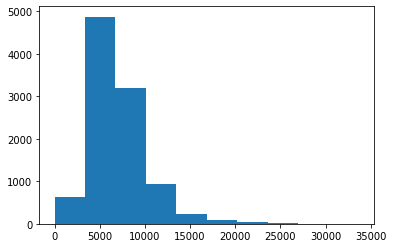

In [181]:
plt.hist(merged_df.Sales.sample(10000))   
plt.show()

- So our model has a RMSE of $2730, which implies we have achieved somewhat an average GB model.

- #### Visualizing the XGBoost Tree:

In [182]:
from xgboost import plot_tree 
from matplotlib.pyplot import rcParams


plt.rcParams['figure.figsize'] = (30,30)

In [183]:
#?plot_tree

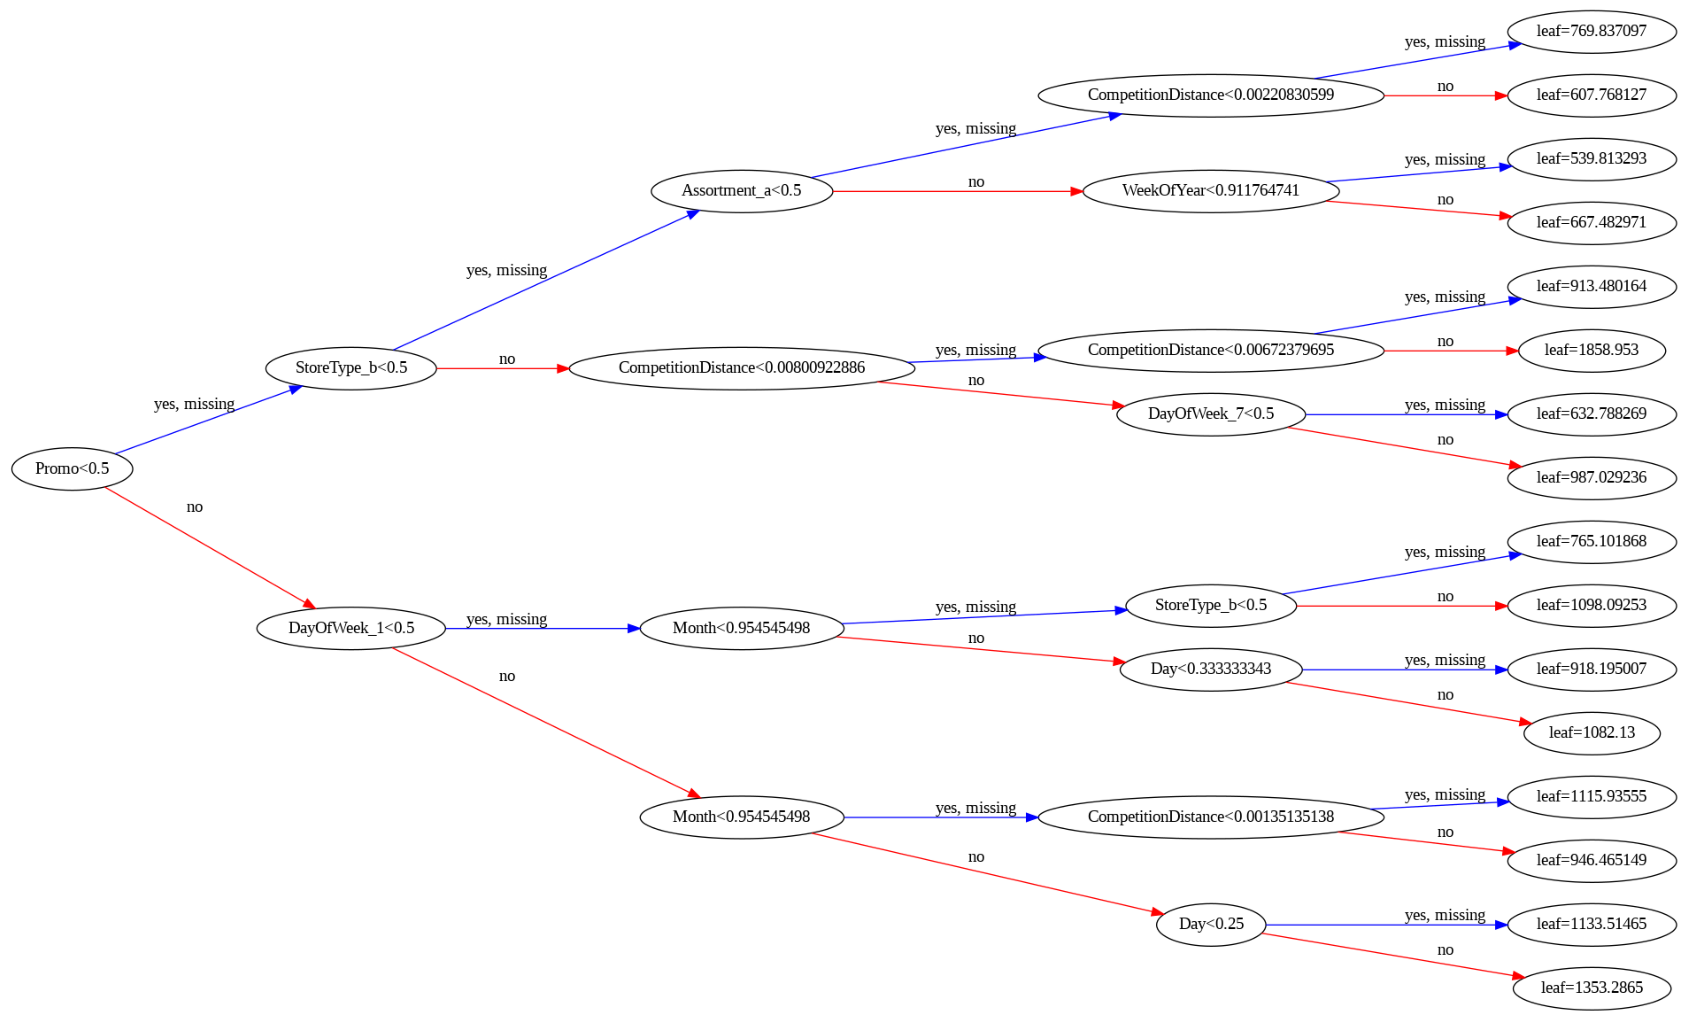

In [184]:
plot_tree(model, rankdir='LR')    

#plot_tree(): 1) model, is the XGBoost model that is passed as the first argument
            # 2) rankdir, is the orientation of the tree model for easy readability

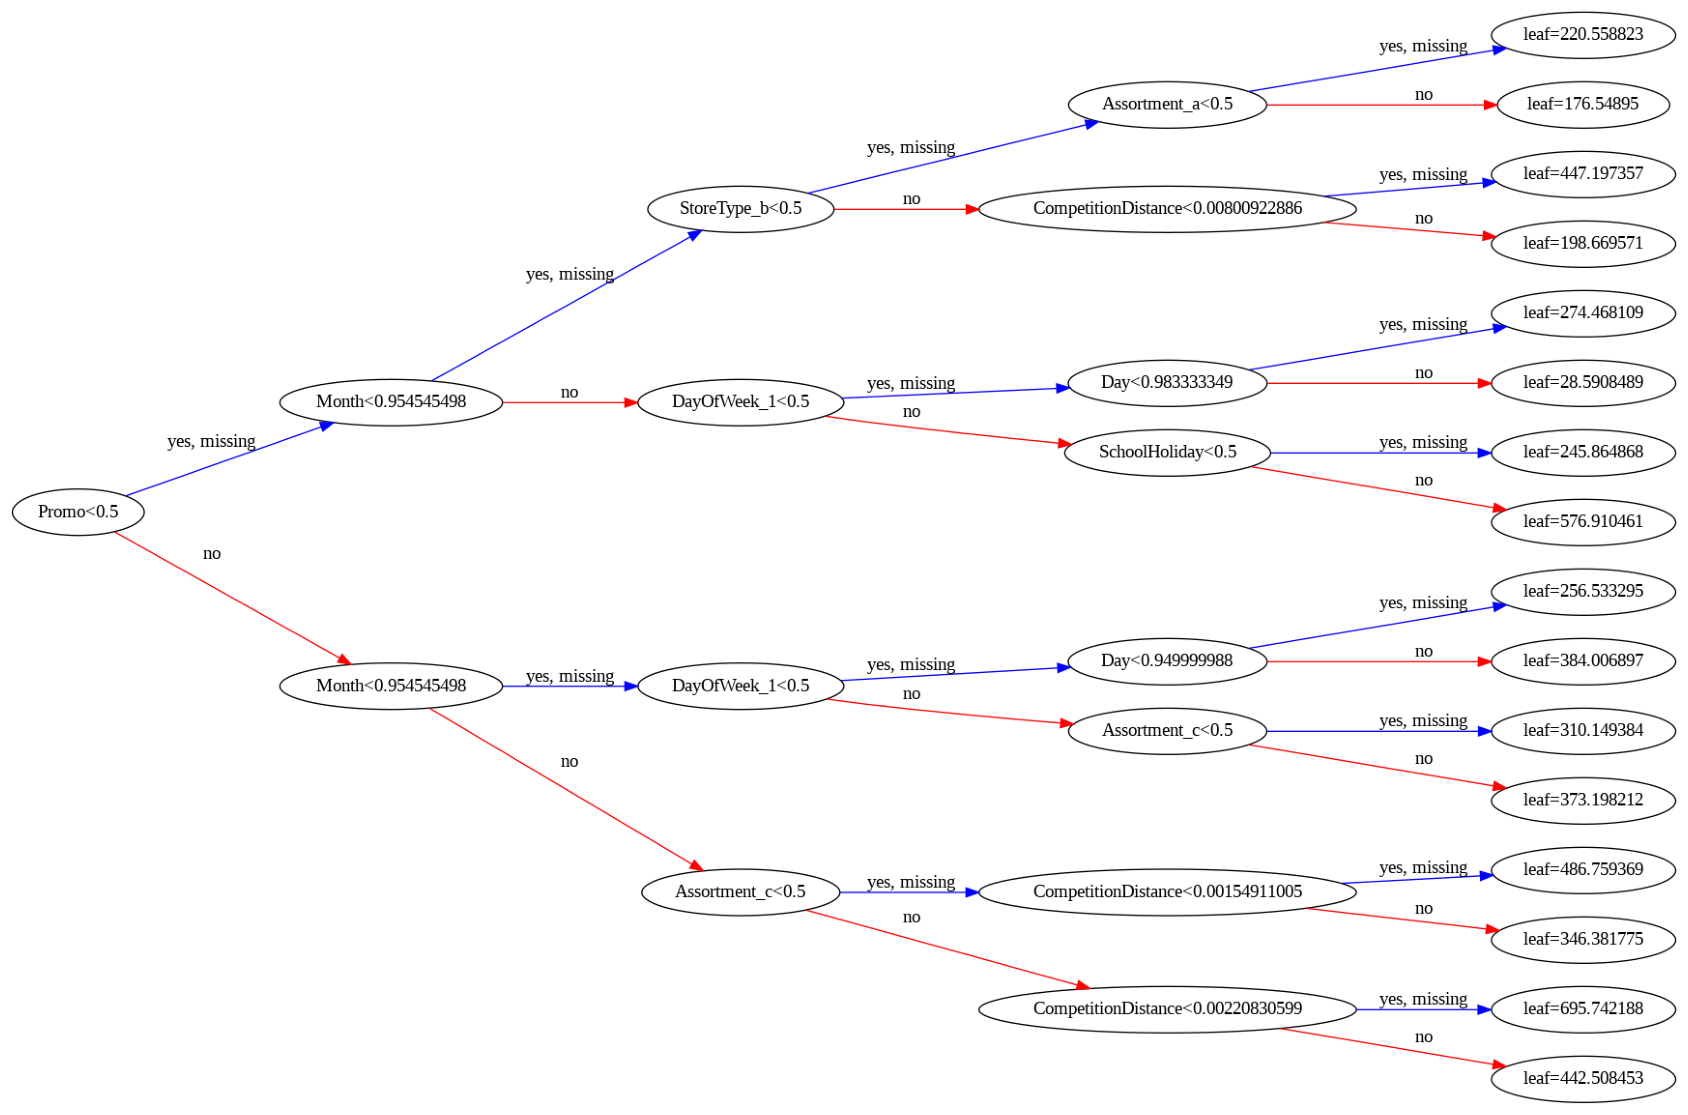

In [185]:
plot_tree(model, rankdir = 'LR', num_trees= 10)

# * num_tree: this arg plots the tree number passed through it, for ex. the value 10 represents the 10th iterated decision tree that was plotted for the gradient boost model

- Alternate way to plot the XGBoost model:

In [186]:
trees = model.get_booster().get_dump()

In [187]:
len(trees) #no. of trees plotted for our XGB model

20

In [188]:
#Plotting any tree out of it

print(trees[12])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[Assortment_a<0.5] yes=3,no=4,missing=3
		3:[CompetitionDistance<0.00220830599] yes=7,no=8,missing=7
			7:[Promo2<0.5] yes=15,no=16,missing=15
				15:leaf=394.840332
				16:leaf=197.634552
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=171.122116
				18:leaf=281.863739
		4:[StoreType_b<0.5] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.168688208] yes=19,no=20,missing=19
				19:leaf=147.134079
				20:leaf=-12.9703054
			10:[CompetitionOpen<0.0191197693] yes=21,no=22,missing=21
				21:leaf=524.424255
				22:leaf=108.812393
	2:[Month<0.954545498] yes=5,no=6,missing=5
		5:[DayOfWeek_1<0.5] yes=11,no=12,missing=11
			11:[Day<0.949999988] yes=23,no=24,missing=23
				23:leaf=205.068161
				24:leaf=319.771454
			12:[Day<0.949999988] yes=25,no=26,missing=25
				25:leaf=273.106903
				26:leaf=415.965546
		6:[Day<0.316666663] yes=13,no=14,missing=13
			13:[Day<0.150000006] yes=27,no=28,missing=27
				27:leaf=320.566833
				28:leaf=124.5

- #### Importance of Selected Features:

In [189]:
# Creating a DataFrame for the importances of the features selected:


importance_df = pd.DataFrame({
    'feature' : X.columns,
    'importance' : model.feature_importances_
}).sort_values('importance', ascending = False)

In [190]:
importance_df

,feature,importance
1,Promo,0.449538
12,DayOfWeek_1,0.105968
24,StoreType_b,0.053620
27,Assortment_a,0.044358
0,Store,0.040449
5,Promo2,0.037782
9,Month,0.036089
3,CompetitionDistance,0.033558
11,WeekOfYear,0.032680
2,SchoolHoliday,0.029526


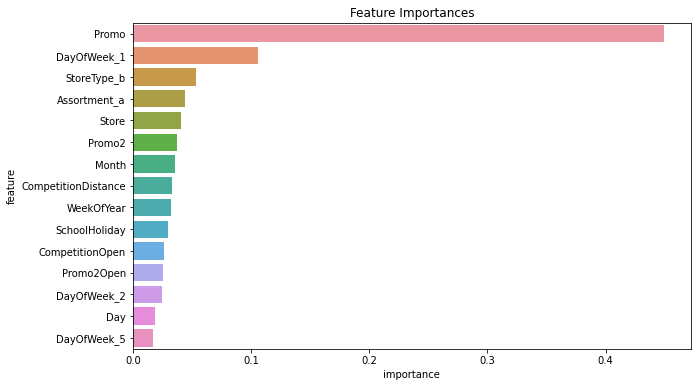

In [191]:
 #visualizing the importances on a graph

import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(data = importance_df.head(15), x = 'importance', y = 'feature')
plt.show()

###  Phase 4: Creating a Validation dataset using K-Fold Cross Validation

In [192]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

In [193]:
from sklearn.model_selection import KFold

In [194]:
#creating the KFold object:

kfold = KFold(n_splits = 5)

In [195]:
models = []

for train_indexes, val_indexes in kfold.split(X):
  X_train, train_targets = X.iloc[train_indexes], target_df.iloc[train_indexes]
  X_val, val_targets = X.iloc[val_indexes], target_df.iloc[val_indexes]
  model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, n_estimators = 20, max_depth = 4)
  models.append(model)
  print(f"Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

[14:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2722.781019376339, Validation RMSE: 2844.9796623701504
[14:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2723.4763094790396, Validation RMSE: 2762.170797471659
[14:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2748.0965773794287, Validation RMSE: 2720.3007972887913
[14:56:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2715.2774107780133, Validation RMSE: 2818.12183374767
[14:56:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 2732.182493512736, Validation RMSE: 2663.406231268922


- *RMSE loss of the 5 models created here*: <br>
1. 1st model: Training RMSE: 2722.781019376339, Validation RMSE: 2844.9796623701504 <br>
2. 2nd model: Train RMSE: 2723.4763094790396, Validation RMSE: 2762.170797471659 <br>
3. 3rd model: Train RMSE: 2748.0965773794287, Validation RMSE: 2720.3007972887913 <br>
4. 4th model: Train RMSE: 2715.2774107780133, Validation RMSE: 2818.12183374767 <br>
5. 5th model: Train RMSE: 2732.182493512736, Validation RMSE: 2663.406231268922


Calculating the average of prediction of all models:

In [196]:
def predict_avg(models, inputs): #a helper function to return a mean of all predictions of the 5 models created during KFold splitting
  return np.mean([model.predict(inputs) for model in models], axis = 0)

In [197]:
preds_avg = predict_avg(models, X)

In [198]:
preds_avg

array([7192.335 , 6836.343 , 7170.353 , ..., 6726.388 , 6372.891 ,
       7769.5757], dtype=float32)

### Phase 5: Hyperparameter Tuning for better results:

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_val, train_targets, val_targets = train_test_split(X, target_df, test_size = 0.1)

In [201]:
def test_parameters(**params):
  model = XGBRegressor(n_jobs = -1, random_state = 42, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print(f"Training RMSE: {train_rmse}, Validation RMSE: {val_rmse}")
  


- 1) n_estimators:

In [202]:
#[test_parameters(n_estimators = n) for n in range(1,250)]

In [203]:
#creating a function to calculate Train RMSE and Val RMSE on multiple values of n_estimators:


"""def test_n_estimators(n_est):
  model = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators= n_est)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return {
      "n_estimators" : n_est,
      "Train_RMSE" : train_rmse, 
      "Val_RMSE" : val_rmse
  }"""


'def test_n_estimators(n_est):\n  model = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators= n_est)\n  model.fit(X_train, train_targets)\n  train_rmse = rmse(model.predict(X_train), train_targets)\n  val_rmse = rmse(model.predict(X_val), val_targets)\n  return {\n      "n_estimators" : n_est,\n      "Train_RMSE" : train_rmse, \n      "Val_RMSE" : val_rmse\n  }'

In [204]:
#n_est_df = pd.DataFrame([test_n_estimators(n_est) for n_est in range(1, 100, 5)])

In [205]:
#plotting a chart to find out an optimal value for n_estimators

"""plt.figure(figsize=(10,6))
plt.plot(n_est_df['n_estimators'], n_est_df['Train_RMSE'])
plt.plot(n_est_df['n_estimators'], n_est_df['Val_RMSE'])
plt.title("Training vs Validation RMSE")
plt.xticks(range(1, 100, 5))
plt.xlabel("N_estimators")
plt.ylabel("RMSE error")
plt.legend(['Training', 'Validation'])
plt.show()"""

'plt.figure(figsize=(10,6))\nplt.plot(n_est_df[\'n_estimators\'], n_est_df[\'Train_RMSE\'])\nplt.plot(n_est_df[\'n_estimators\'], n_est_df[\'Val_RMSE\'])\nplt.title("Training vs Validation RMSE")\nplt.xticks(range(1, 100, 5))\nplt.xlabel("N_estimators")\nplt.ylabel("RMSE error")\nplt.legend([\'Training\', \'Validation\'])\nplt.show()'

2) max_depth:

In [206]:
test_parameters(max_depth = 5, n_estimators = 50)


[14:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 2323.111675553458, Validation RMSE: 2332.993432082261


In [207]:
test_parameters(max_depth = 8, n_estimators = 50)

[14:58:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 1869.7133266462065, Validation RMSE: 1890.2804452375933


In [208]:
test_parameters(max_depth = 15, n_estimators = 50)

[15:00:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 1001.7031225212778, Validation RMSE: 1164.5023690057112


In [209]:
test_parameters(max_depth = 20, n_estimators = 50)

[15:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 556.5871221041386, Validation RMSE: 1002.0587839256583


3) Learning Rate:

In [210]:
test_parameters(n_estimators = 50, learning_rate = 0.25)

[15:14:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 2348.4874170525336, Validation RMSE: 2355.182270980053


In [211]:
test_parameters(n_estimators = 50, learning_rate = 0.40)

[15:15:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 2205.847944905296, Validation RMSE: 2213.869053130716


In [212]:
test_parameters(n_estimators = 50, learning_rate = 0.55)

[15:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 2070.409120567259, Validation RMSE: 2078.343291556499


In [213]:
test_parameters(n_estimators = 50, learning_rate = 0.60, max_depth = 20)

[15:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE: 51.367766853298924, Validation RMSE: 939.5005094463069


- Creating the finalized version of the XGBRegressor model:

In [214]:
model_new = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 1000, sub_sample = 0.9, colsample_bytree=0.60, learning_rate = 0.30, max_depth = 10)

In [215]:
%%time

model_new.fit(X, target_df)

[15:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 37min 5s, sys: 3.07 s, total: 37min 8s
Wall time: 37min 9s


XGBRegressor(colsample_bytree=0.6, learning_rate=0.3, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, sub_sample=0.9)

In [216]:
test_preds = model_new.predict(X_test)

In [217]:
sample_sub_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [218]:
sample_sub_df['Sales'] = test_preds

In [219]:
testing_df.Open.isna().sum()

11

there are 11 entries that have a NaN value in place of Open(1)/Close(0) for the store state


In [220]:
sample_sub_df['Sales'] = sample_sub_df['Sales'] * testing_df.Open.fillna(1.)

In [221]:
sample_sub_df

,Id,Sales
0,1,3690.958740
1,2,7244.409180
2,3,9185.596680
3,4,7713.328125
4,5,6899.442871
...,...,...
41083,41084,3533.179199
41084,41085,7685.505859
41085,41086,6232.612305
41086,41087,23629.859375


In [222]:
sample_sub_df.to_csv("submissions_new.csv", index = None)

In [223]:
from IPython.display import FileLink

In [224]:
FileLink("submissions_new.csv")

/content/submissions_new.csv

In [225]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
